In [ ]:
# ubid:rahujag@buffalo.edu, ubno:50379771
# Importing Important libraries
#!pip install pgmpy
import pgmpy
from matplotlib import pyplot as plt
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
from pgmpy.inference.ExactInference import BeliefPropagation
import networkx as nx
%matplotlib inline


# Part 1

In [ ]:
#Creating Bayisian Model
bayesian_model = BayesianModel([('asia','tub'),
                                ('smoke','lung'),
                                ('smoke','bronc'),
                                ('tub','either'),
                                ('lung','either'),
                                ('either','xray'),
                                ('bronc','dysp'),
                                ('either','dysp')])

In [ ]:
# Populating the Model
asia_cpd   = pgmpy.factors.discrete.TabularCPD('asia', 2, [[0.01], [0.99]])
tub_cpd    = pgmpy.factors.discrete.TabularCPD('tub', 2, [[0.05, 0.01], [0.95, 0.99]], ['asia'], [2])
smoke_cpd  = pgmpy.factors.discrete.TabularCPD('smoke', 2, [[0.5], [0.5]])
lung_cpd   = pgmpy.factors.discrete.TabularCPD('lung', 2, [[0.1, 0.01], [0.9, 0.99]], ['smoke'], [2])
bronc_cpd  = pgmpy.factors.discrete.TabularCPD('bronc', 2, [[0.6, 0.3], [0.4, 0.7]], ['smoke'], [2])
either_cpd = pgmpy.factors.discrete.TabularCPD('either', 2, [[1, 1, 1, 0], [0, 0, 0, 1]], ['lung', 'tub'], [2, 2])
xray_cpd   = pgmpy.factors.discrete.TabularCPD('xray', 2, [[0.98, 0.05], [0.02, 0.95]], ['either'], [2])
dysp_cpd   = pgmpy.factors.discrete.TabularCPD('dysp', 2, [[0.9, 0.7, 0.8, 0.1], [0.1, 0.3, 0.2, 0.9]], ['bronc', 'either'], [2, 2])

bayesian_model.add_cpds(asia_cpd, tub_cpd, smoke_cpd, lung_cpd, bronc_cpd, either_cpd, xray_cpd, dysp_cpd)

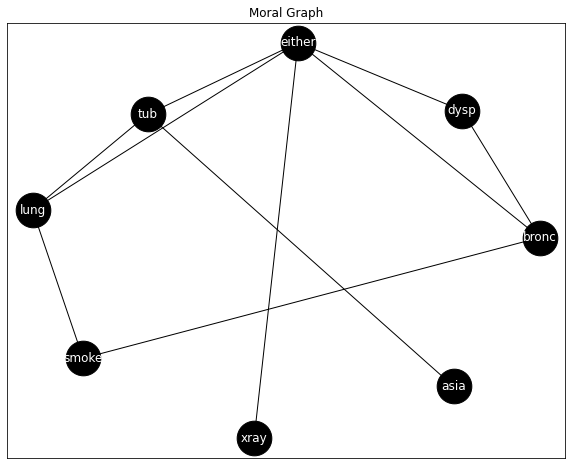

In [ ]:
markov_model = bayesian_model.to_markov_model()
plt.figure(figsize=(10,8))
plt.title('Moral Graph')
nx.draw_networkx(markov_model, node_size=1200, node_color='k', font_color='white')
plt.show()


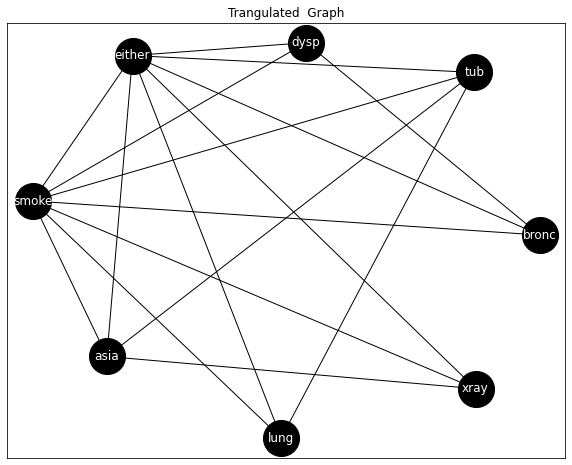

In [ ]:
triangulated_model = markov_model.triangulate()
plt.figure(figsize=(10,8))
plt.title('Trangulated  Graph')
nx.draw_networkx(triangulated_model, node_size=1300,node_color='k', font_color='white')
plt.show()

Nodes in Junction Tree : ('smoke', 'either', 'tub', 'asia')
Nodes in Junction Tree : ('smoke', 'either', 'tub', 'lung')
Nodes in Junction Tree : ('smoke', 'either', 'xray', 'asia')
Nodes in Junction Tree : ('smoke', 'either', 'dysp', 'bronc')


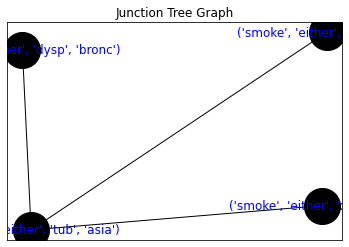

In [ ]:
# Creatiing Juction Tree Model
junction_tree = triangulated_model.to_junction_tree()

for node in junction_tree.nodes():
    print("Nodes in Junction Tree :", node)

plt.figure()
plt.title('Junction Tree Graph')
nx.draw_networkx(junction_tree,nx.spring_layout(junction_tree), node_size=1300,node_color='k', font_color='blue')
plt.show()

If two clusters have a common node in a junction tree, it suffices the Running Intersection Property.In above junction tree **{ 'smoke', 'either' }** can be seen in all clusters.Hence, '**Running Intersection Property**' has been satisfied in the above junction tree.


# Part 2

In [ ]:
# Creating Massage Passing Algorithm  VariableElimination for Joint Probability

inference = VariableElimination(bayesian_model)
joint_probability = inference.query(['tub','lung','bronc'],
                                      {'asia':0,'xray':0})

print(joint_probability)

Eliminating: smoke: 100%|██████████| 3/3 [00:00<00:00, 164.47it/s]

+---------+--------+----------+-----------------------+
| lung    | tub    | bronc    |   phi(lung,tub,bronc) |
+=========+========+==========+=======================+
| lung(0) | tub(0) | bronc(0) |                0.0106 |
+---------+--------+----------+-----------------------+
| lung(0) | tub(0) | bronc(1) |                0.0079 |
+---------+--------+----------+-----------------------+
| lung(0) | tub(1) | bronc(0) |                0.2021 |
+---------+--------+----------+-----------------------+
| lung(0) | tub(1) | bronc(1) |                0.1508 |
+---------+--------+----------+-----------------------+
| lung(1) | tub(0) | bronc(0) |                0.1413 |
+---------+--------+----------+-----------------------+
| lung(1) | tub(0) | bronc(1) |                0.1778 |
+---------+--------+----------+-----------------------+
| lung(1) | tub(1) | bronc(0) |                0.1370 |
+---------+--------+----------+-----------------------+
| lung(1) | tub(1) | bronc(1) |                0

In [ ]:
# Creating Massage Passing Algorithm  BeliefPropagation for Joint Probability
propagation = BeliefPropagation(bayesian_model)
joint_proba = propagation.query(['tub', 'lung', 'bronc'],
                                {'asia':0, 'xray':0})
print(joint_proba)

/usr/local/lib/python3.7/dist-packages/pgmpy/factors/discrete/DiscreteFactor.py:788: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi1.values
Eliminating: smoke: 100%|██████████| 3/3 [00:00<00:00, 179.29it/s]

+--------+----------+---------+-----------------------+
| tub    | bronc    | lung    |   phi(tub,bronc,lung) |
+========+==========+=========+=======================+
| tub(0) | bronc(0) | lung(0) |                0.0106 |
+--------+----------+---------+-----------------------+
| tub(0) | bronc(0) | lung(1) |                0.1413 |
+--------+----------+---------+-----------------------+
| tub(0) | bronc(1) | lung(0) |                0.0079 |
+--------+----------+---------+-----------------------+
| tub(0) | bronc(1) | lung(1) |                0.1778 |
+--------+----------+---------+-----------------------+
| tub(1) | bronc(0) | lung(0) |                0.2021 |
+--------+----------+---------+-----------------------+
| tub(1) | bronc(0) | lung(1) |                0.1370 |
+--------+----------+---------+-----------------------+
| tub(1) | bronc(1) | lung(0) |                0.1508 |
+--------+----------+---------+-----------------------+
| tub(1) | bronc(1) | lung(1) |                0

**Clusters from Junction Tree**

* Node 1 : 'smoke', 'either', 'tub', 'asia'  <br>
* Node 2 : smoke', 'either', 'tub', 'lung'<br>
* Node 3 : 'smoke', 'either', 'xray', 'asia <br>
* Node 4 : 'smoke', 'either', 'dysp', 'bronc' <br>

Since node 4 is a leaf node we can pass the message from the node 4 to node 3. As it can be seen that asia is a common data, we will sum it over asia (A).

Node 1 to Node 2 :
$ 
\psi ( s,\ e,\ t,\ a) \ =\ p( s|e,\ t|a)
$
</br>
Node 2 to Node 3 :
$
\psi ( s,\ e,\ t,\,l ) \ =\ p(t|a,l)
$
</br>

Node 3 to Node 2 :
$
\psi ( s,\ e,\ x,\ a ) \ =\ p(x|a) \ p( t|a,\ l)
$
</br>

Node 2 to Node 4 :
$\psi ( s,\ e,\ d,\ b) \  =\ p(s|e) \ p( d|b) \ p(t|a)
$